# Day 3 - Numpy and Numerical Methods

## Agenda
1. numpy
  1. creating basic ndarrays.
  2. indexing + slicing.
  3. math. a word to the wise.
  4. broadcasting, an introduction.
  5. worked example.
2. numerical methods
  1. finding zeros of functions.
  2. scipy.minimize .
  3. simple derivatives and integrals.
  4. scipy.interpolate .
  5. project.

#>>  
first step: show everyone how to download this from github  
second step: update and import 

code sources:  
https://numpy.org/doc/stable/user/basics.creation.html#arrays-creation  
https://cs231n.github.io/python-numpy-tutorial/

In [206]:
# imports for this notebook
import numpy as np
np.set_printoptions(suppress=True) # disable scientific notation
import scipy.optimize, scipy.interpolate, scipy.integrate, scipy.misc
import time
import matplotlib.pyplot as plt

## Part 1: numpy

universally accepted as the core computing library for python. pretty much every other major library is built on top of numpy: scipy, pandas, matplotlib, xarray, Dask, scikit-learn, PyTorch, TensorFlow, seaborn, plotly....

pretty much everyone imports it like above: `import numpy as np`, that's how you'll pretty much always see it in documentation

n.b.: for numpy, it's generally best practice to not overwrite standard python functions, i.e. don't use `from numpy import [packages]`. too many shared names across libraries, e.g. the python built-in `sum()`, numpy `np.sum()`, and pandas `pd.sum()` have slightly different functionalities and under-the-hood methods; don't mix them up in your imports bc then you're not sure which library you're using when calling `sum()`.

n.b.b: numpy is a very large library. where you can, import specific modules rather than all of numpy; if you're only using `ndarray`s and their methods, then call `import numpy.ndarray`, not the full library. especially important when doing things on Midway, e.g.

### > (i) creating basic numpy arrays.

In [2]:
a = [1,2,3,4,5] #basic python array
aa = np.array([1,2,3,4,5]) #basic np array
print(a)
print(aa)

[1, 2, 3, 4, 5]
[1 2 3 4 5]


In [3]:
print(type(a))
print(type(aa))

<class 'list'>
<class 'numpy.ndarray'>


#>> what's the difference between `len()` and `.shape`?  

also mention that here's a rare case of using an instance variable in normal usage

In [6]:
print(len(a))
print(len(aa))
print(aa.shape)
print(a.shape)

5
5
(5,)


AttributeError: 'list' object has no attribute 'shape'

In [7]:
b = [[1,2],[3,4],[5,6]]
bb = np.array(b)
print(b)
print(bb)
print(len(b))
print(len(bb))
print(bb.shape)

[[1, 2], [3, 4], [5, 6]]
[[1 2]
 [3 4]
 [5 6]]
3
3
(3, 2)


#>> common ways to instantiate ndarray objects

In [10]:
a = np.zeros((2,2))
print(a)
print("")

b = np.ones((2,3,2))
print(b)
print("")

c = np.random.random(10)
print(c)
print("")

d = np.eye(5)
print(d)
print("")

e = np.diag([1,2,3,4])
print(e)

[[0. 0.]
 [0. 0.]]

[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]

[0.40024334 0.49804347 0.71498841 0.31178827 0.3452353  0.81484285
 0.36796503 0.19094328 0.18006926 0.29599232]

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


dtypes specify the 'number type' of the values we store in the arrays. it is a memory allocation; by default, it will be float64 (occasionally int64, depending on what is passed, like diag above)

very easy parameter to add

In [22]:
a = np.array([1,2,3,4,5])
print(a)
b = np.array([1,2,3,4,5], dtype='float32') # dtype=np.float32 also works, if you prefer
print(b)

[1 2 3 4 5]
[1. 2. 3. 4. 5.]


however! you must be careful with this, to make sure you don't overfill the memory allocations!!

In [21]:
a = np.array([127, 128, 129], dtype='int8')
print(a)

[ 127 -128 -127]


`arange()` and `linspace()` are also commonly used methods to instantiate arrays. what's the difference? 

In [29]:
print(np.arange(10))
print(np.arange(2,7)) # defaults to int where possible
print(np.arange(0,1,.1))
print(np.arange(0,1,.333))
print(np.arange(0,1,.249999999))

[0 1 2 3 4 5 6 7 8 9]
[2 3 4 5 6]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.    0.333 0.666 0.999]
[0.   0.25 0.5  0.75 1.  ]


In [38]:
print(np.linspace(1,10,1))
print(np.linspace(1,10,10)) # always defaults to float
print(np.linspace(1,10,10, dtype='int'))
print(np.linspace(0,1,5))
print(np.linspace(0,1,101))

[1.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1  2  3  4  5  6  7  8  9 10]
[0.   0.25 0.5  0.75 1.  ]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


how do we combine ndarrays?

In [57]:
# horizontal stacking, i.e. row1 + row1, row2 + row2
a = np.array([[0,0],[1,1]]) # shape(2,2)
b = np.array([[2,2,2],[3,3,3]]) # shape(2,3)
print(a)
print("")
print(b)
print("")
print( np.hstack((a,b)) )

[[0 0]
 [1 1]]

[[2 2 2]
 [3 3 3]]

[[0 0 2 2 2]
 [1 1 3 3 3]]


In [55]:
# vertical stacking, i.e. col1 + col1, col2 + col2
bt = b.T # shape(3,2)
print(a)
print("")
print(bt)
print("")
print( np.vstack((a, bt)) )

[[0 0]
 [1 1]]

[[2 3]
 [2 3]
 [2 3]]

[[0 0]
 [1 1]
 [2 3]
 [2 3]
 [2 3]]


if you don't match the dimensions correctly, you will get a moderately confusing error message:

In [58]:
print( np.hstack((a, bt)) )

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 3

In [60]:
# we also have np.block, to make larger arrays
A = np.ones((2, 2))
B = np.eye(2)
C = np.zeros((2, 2))
D = np.diag((-3, -4))
print(np.block([[A, B],[C,D]]))

[[ 1.  1.  1.  0.]
 [ 1.  1.  0.  1.]
 [ 0.  0. -3.  0.]
 [ 0.  0.  0. -4.]]


by far the most useful of these methods is the `reshape()` function. when you are manually creating your arrays, it is often faster to create a one-dimensional matrix with all of your values, then `reshape` it into the desired dimensionality, than it is to outright create the matrix in the correct dimensionality.

In [108]:
a = np.arange(100)
a = a.reshape((10,10))
print(a)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


finally, we can read in `.csv` and `.txt` files (and other data types) directly as `ndarray`s, using the function `np.load()`. we won't do that today, but it is very useful when you're doing data analysis and have transformed a bunch of your data into `ndarray` format. it can then be saved directly as a `.npy` file, which makes reading it in at a later date dramatically faster than saving everything as `.csv` and converting to `ndarray`.

### > (ii) indexing + slicing.

In [75]:
# standard python version
a = [[1,2,3],[4,5,6]]
print(a[0])
print(a[0][1:])
print(a[1:][1:])
print("")

# numpy
aa = np.array(a)
print(aa[0])
print(aa[0][1:])
print(aa[0,1:]) # best way to access numpy arrays
print(aa[1:,1:])

[1, 2, 3]
[2, 3]
[]

[1 2 3]
[2 3]
[2 3]
[[5 6]]


In [81]:
# why use slicing?
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
print(a.shape)
print("")

b = a[:2, 1:2]
print(b)
print(b.shape)
print("")

c = a[:2, 1]
print(c)
print(c.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)

[[2]
 [6]]
(2, 1)

[2 6]
(2,)


however! we have to be careful:

In [88]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print("")

# let's get the first column and keep the shape
b = a[:,0:1]
print(b)
print("")

# modify this new array
b += 5
print(b)
print("")

print(a) # :(

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1]
 [4]
 [7]]

[[ 6]
 [ 9]
 [12]]

[[ 6  2  3]
 [ 9  5  6]
 [12  8  9]]


everytime we slice and dice a numpy array, __WE ARE NOT CREATING A NEW ARRAY__. we are only creating a 'view' along a particular cross-section. be very careful when changing numpy arrays.

if you would like to create a new array, then use `copy()`:

In [89]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print("")

# let's get the first column and keep the shape
b = a[:,0:1].copy()
print(b)
print("")

# modify this new, COPIED array
b += 5
print(b)
print("")

print(a) # :)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1]
 [4]
 [7]]

[[ 6]
 [ 9]
 [12]]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


numpy also lets us do 'integer array indexing', which basically just means "using a numpy array to select values from a different numpy array"

In [94]:
a = np.array([[1,2], [3, 4], [5, 6]])
b = np.array([[0,1,2],[0,1,0]]) # just for clarification, can't actually use variable b in the indexing call
print(a)
print("")
print(b)
print("")

print(a[[0,1,2],[0,1,0]]) # equivalent to: np.array( [a[0,0], a[1,1], a[2,0]] )
print("")

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

[[1 2]
 [3 4]
 [5 6]]

[[0 1 2]
 [0 1 0]]

[1 4 5]

[2 2]


#### Exercise

__problem__: you are given an array `a`. use integer array indexing to successfully print out the `mutated_a` array given in the code below. 

_hint_: _you should take advantage of the 'view' capabilities of selecting elements to perform the desired mutation; create a one-dimensional array that captures the columns, and then use one of the elementary array methods to index the rows_.

In [ ]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)
print("")

### your code here ###

# >> solution
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

# << end

print(a)  # should print out mutated_a, given below

# mutated_a: 
# [[11,  2,  3],
#  [ 4,  5, 16],
#  [17,  8,  9],
#  [10, 21, 12]]

boolean array indexing is very similar to what we just did, except we just use the numerical form of booleans to do the indexing.

recall that `True = 1` and `False = 0`. so then a boolean indexing call only returns values of our array where the condition is `True`.

In [96]:
a = np.array([[1,2],[3,4],[5,6]])
bidx = a > 3
print(bidx)
print("")

# select only the truthful elements of a
print(a[bidx]) # equivalent: a[a>3]

[[False False]
 [False  True]
 [ True  True]]

[4 5 6]


notice, however, that it does flatten our array. if you wish to keep the original structure of the array, it is generally better to use masked arrays. we will not go over this here, but if you're interested, take a look at the documentation of `numpy.ma` [here](https://numpy.org/doc/stable/reference/maskedarray.html). for completeness, here is a simple example.

In [97]:
masked_a = np.ma.masked_where(a>3, a)
print(masked_a)

[[1 2]
 [3 --]
 [-- --]]


### > (iii) math. a word to the wise.

numpy math is pretty much always element-wise. that's kinda it, really

In [114]:
a = np.ones(10)
b = np.arange(1,11)
print(a+b)
print(a-b)
print(a*b)
print(a/b)

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1       ]


we also have the built-in methods `sum()`, `diff()`, `multiply()`, and `divide()`, but numpy is written in such a way that calling the `+` operator is a shortcut to `np.sum()`, and so on. __numpy is so fundamental to python that it was allowed to overwrite the basic math operators!__

one of the few times where we may not want elementwise operations is when performing dot products. for this, we use the numpy function `dot()`:

In [117]:
# inner product
a = np.arange(1,6)
b = np.arange(1,6)
print(a.dot(b))
print(np.dot(a,b))
print()

# matrix multiplication
a = np.random.random((3,3))
print(a)
print()
b = np.diag(np.arange(3))
print(a.dot(b))

55
55

[[0.59694326 0.10712422 0.09280547]
 [0.81011884 0.64462749 0.08115925]
 [0.40633398 0.87047878 0.75567186]]

[[0.         0.10712422 0.18561094]
 [0.         0.64462749 0.1623185 ]
 [0.         0.87047878 1.51134371]]


__use built-in methods wherever possible.__ never ever write your own numpy methods unless you are 1000% certain the function doesn't already exist.

suppose we want to sum every element in an 3-dimensional numpy array. here's how we would do it manually:

In [103]:
def sum_with_loop(a):
    a_sum = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            for n in range(a.shape[2]):
                a_sum += a[i,j,n]
    return a_sum

# timing how long it takes to do this 100 times
t0 = time.time()
for i in range(100):
    a = np.random.uniform(size=(100,10,5))
    a_sum = sum_with_loop(a)
t1 = time.time()
print(f"Time: {t1 - t0} seconds")
print(f"Appx {(t1-t0)/100} seconds per sum")

Time: 0.16793274879455566 seconds
Appx 0.0016793274879455566 seconds per sum


compare this to the built-in method:

In [104]:
t0 = time.time()

for i in range(100):
    a = np.random.uniform(size=(100,10,5))
    a_sum = np.sum(a)
t1 = time.time()
print(f"Time: {t1 - t0} seconds")
print(f"Appx {(t1-t0)/100} seconds per sum")

Time: 0.007706880569458008 seconds
Appx 7.706880569458008e-05 seconds per sum


using the built-in version is approximately 100 times faster for even such a simple example. trying to implement methods like `mean()` are often 4-5 orders of magnitude slower in native python, since all of the built-in methods are written in C (a compiled language) and therefore outperform anything you could ever write in python.

in fact, let's take a look at the [documentation!](https://numpy.org/doc/stable/reference/routines.math.html)

## __BREAK__

### > (v) broadcasting, an introduction.

when we have a large array and a smaller array, we often want to use the smaller array many times on the larger, e.g. a matrix whose columns we want to add the same vector to. we could stack the vector several times to get it to the correct dimension before adding the two, but numpy has a "broadcasting mechanism" that allows us to skip this often very-time-consuming step.

in a nutshell, there are 5 rules to broadcasting:
1. if two arrays do not have the same rank, add one dimension on the left until they do (i.e. 'prepend' it)
  - e.g. if we have a.shape = (3,3,10) and b.shape = (10), then b gets recast as b.shape = (1,1,10)
2. two arrays are "compatible" in a dimension if either
  - they have the same size in that dimension (e.g. (1,3,5) and (4,3,2) are compatible in dimension 2)
  - one or both has size one in that dimension
3. arrays can be broadcast only if they are compatible in all dimensions
4. the resulting array after broadcasting has the maximum size between the two broadcasted arrays at each dimension 
  - (1,3,5) and (4,3,1) gets broadcast to (4,3,5)
5. if array 1 has size 1 in a dimension, and array 2 has size > 1 in that dimension, the broadcast array acts as if it were copied along that dimension
  - in the example for (4), the values corresponding to dimension 1 (with size 1) get copied 4 times; i.e., [3] gets broadcast to [3, 3, 3, 3]
  
i personally find it very confusing, so let's take a look at some examples.

In [118]:
# source: https://cs231n.github.io/python-numpy-tutorial/
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)
print("")

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)
print()

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
print()
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))
print()

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]

[[2 4 6]
 [5 7 9]]

[[ 5  6  7]
 [ 9 10 11]]

[[ 5  6  7]
 [ 9 10 11]]

[[ 2  4  6]
 [ 8 10 12]]


broadcasting is very important when it comes to speeding up your code, as using broadcasting allows numpy's built-in vectorization methods take over. this is especially relevant when running things on supercomputing clusters like Midway, as vectorization allows for distributing the computation over many computing nodes.

### > (v) worked example.

let's go through a problem together, to practice using numpy arrays and methods.

__problem:__ let's suppose we collected some data to try to measure some important physical property*, but we suspect there are outliers that would influence the mean. instead, report the median with a 95% confidence interval.

__further information__: we are going to be simulating the data, rather than reading in a dataset, because ~i was too lazy to find one~ simulating data is good practice. let's suppose our true value $x$ follows a normal distribution $x \sim N(\mu=4, \sigma^2=2)$, and our outliers $y$ are chi-square distributed $y \sim \chi ^2(k=6)$, and approximately 5% of our data is made up of outliers. let's also suppose we have 1000 total data points (appx 9950 'real' and 50 outliers). we will use a bootstrap to approximate the true median and 95% CI.

*this is actually the technique used by Simon Newcombe in 1878 to measure the speed of light to an accuracy of about .004% error, despite having 2 outliers in his measurements.

In [179]:
# >> all of this will be removed
### let's generate our data
np.random.seed(2021)
n = 1000
data = np.random.normal(loc=4, scale=np.sqrt(2), size=n) # true data
outliers = np.random.chisquare(df=6, size=n) # outliers

# let's use boolean indexing to help us out here
replace_idx = np.random.random(n)
replace_data = data[replace_idx > .05] # delete any data points that happen to be 'corrupted'

replace_outliers = outliers[replace_idx <= .05] # replace the data with their respective outliers
data = np.concatenate((replace_data, replace_outliers)) # rejoin the two datasets

mean of the data: 4.091153664204938
median of the data: 4.061607167196923


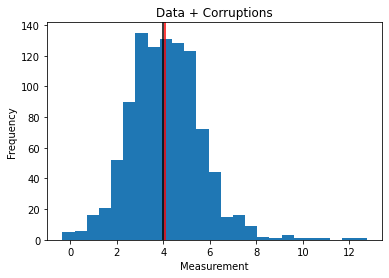

In [180]:
# let's take a look at the data distribution:
print(f"mean of the data: {np.mean(data)}")
print(f"median of the data: {np.median(data)}")
plt.hist(data, bins='scott')
plt.axvline(4, color='black') # true mean
plt.axvline(np.mean(data), color='red')
plt.xlabel("Measurement")
plt.ylabel("Frequency")
plt.title("Data + Corruptions")
plt.show()

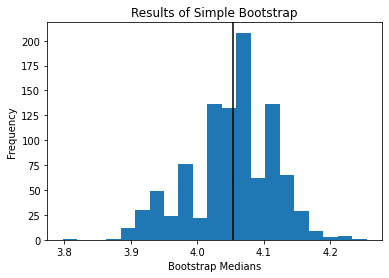

median of medians: 4.059570637280403
95% CI for median: [3.91613945 4.1538087 ]


In [181]:
# bootstrapping
B = 1000 # number of bootstraps to perform
boot_medians = np.empty(B)

# lick some boot...straps
for i in range(B):
    boot_data = np.random.choice(data, size=n, replace=True) # sample 1000 points with replacement
    boot_medians[i] = np.median(boot_data) # find median of bootstrap sample

# plot the bootstrap medians
plt.hist(boot_medians, bins='scott')
plt.axvline(np.mean(boot_medians), color='black')
plt.xlabel("Bootstrap Medians")
plt.ylabel("Frequency")
plt.title("Results of Simple Bootstrap")
plt.show()
print(f"median of medians: {np.median(boot_medians)}") # not a great appx....
print(f"95% CI for median: {np.quantile(boot_medians, (.025, .975))}")

## __BREAK__

## Part 2: Numerical Methods

this section is not meant to be an extensive discussion of numerical methods in python; it will just be a bit of an overview of a handful of the (many) major functions and uses of the `scipy.optimize` library, plus a brief foray into `scipy.interpolate`.

a word of warning: whenever you want to break out any of the numerical methods in `scipy`, __READ THE DOCUMENTATION THOROUGHLY__. there are many very similar functions that on the surface appear to do the same thing, but under the hood and in what they accomplish, can be very different. sometimes, you'll need to switch which one you use because the one you chose just won't converge, or it crashed your computer, or there's a weird error that's not real, or etc etc. it's an art, not a science, so click through the actual documentation and check the 'see also' list at the bottom of each page. 

### > (i) finding zeros of functions.

one of the most common numerical techniques is finding the zero of a function. sometimes it's finding where our ugly little polynomial crosses the x-axis; sometimes finding the zero of a derivative; but mostly, it's for solving highly nonlinear equations, where we just move all of our terms to one side of the equals sign.

if you have a function in analytic form, the best method to use `scipy.optimize.brentq()`; it uses Richard Brent's algorithm. `brentq` requires two parameters beyond the function, which are the end points of the bracket $[a,b]$ we are finding the zero in. it requires that the signs at $a$ and $b$ are opposite, to guarantee the function crosses zero.

In [187]:
def f(x):
    return x**3 - 6*x**2 + 11*x - 6

root = scipy.optimize.brentq(f, .5, 1.5)
print(root)

root2 = scipy.optimize.brentq(f, 1.5, 2.5)
print(root2)

root3 = scipy.optimize.brentq(f, 2.5, 10)
print(root3)

root_suprise = scipy.optimize.brentq(f, 0, 10)
print(root_suprise)

root_err = scipy.optimize.brentq(f, 0, 2.5)
print(root_err)

1.0000000000000002
2.0
3.0000000000000018
0.9999999999999994


ValueError: f(a) and f(b) must have different signs

now let's try something like $(x^2-1) \sin(x) = 2x \cos(x)$

In [201]:
# rewrite function to (x^2-1)sinx - 2x cosx = 0
def f(x):
    return (x**2 - 1) * np.sin(x) - 2*x*np.cos(x)

root = scipy.optimize.brentq(f, 1, 1.5)
print(root)

1.3065423741888063


a more sophisticated, but considerably more likely to break, method is the `fsolve()` function. it allows us to give an approximation to the root if we would like to choose one:

In [198]:
def f(x):
    return x**3 - 6*x**2 + 11*x - 6

root = scipy.optimize.fsolve(f, 4)
print(root)

root2 = scipy.optimize.fsolve(f, 0)
print(root2)

[3.]
[1.]


`fsolve` is also able to solve nonlinear system of equations, such as this one:

$x \cos(y) - 4 = 0$

$xy - y - 5 = 0$

In [200]:
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[0] * x[1] - x[1] - 5]

root = scipy.optimize.fsolve(func, [1, 1])
print(root)

[6.50409711 0.90841421]


`fsolve` allows you to use multidimensional functions, as well as giving a starting estimate to one-dimensional functions (which would allow us to choose the root that brentq finds in the first example), but the algorithm is prone to failure, so use with caution.

### > (ii) `scipy.optimize.minimize`

`minimize` allows us to solve a constrained equation, which is incredibly common within economics. here's a simple example.

given our equation, $f(x) = (x-1)^2 + (y-2.5)^2 = 0$, we have the following constraints:  

$x - 2y + 2 \geq 0$

$-x - 2y + 6 \geq 0$

$-x + 2y + 2 \geq 0$

both $x$ and $y$ must be greater than 0.

In [196]:
# recast (x,y) into np.array([x0, x1])
def f(x): 
    (x[0] - 1)**2 + (x[1] - 2.5)**2

# constraints
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2}, 
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6}, 
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))

res = scipy.optimize.minimize(f, (2, 1), bounds=bnds, constraints=cons)
print(res)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

this is exactly what i mean, theoretically this should just be (1.4, 1.7), but go figure. i give up. i hate numerical methods.

### > (iii) simple integration and differentiation.

the functions we are about to see only work with analytic functions.

below, the examples are: 

$ \int_{0}^4 x^2 dx $

$ \int_0^\infty e^{-x} dx $

$ \frac{d}{dx} x^3 + x^2 |(x=1) $

In [203]:
# integration
x2 = lambda x: x**2
y, err = scipy.integrate.quad(x2, 0, 4)
print(y)

invexp = lambda x: np.exp(-x)
y, err = scipy.integrate.quad(invexp, 0, np.inf)
print(y)

21.333333333333336
1.0000000000000002


In [207]:
# differentiation
def f(x):
    return x**3 + x**2

der = scipy.misc.derivative(f, 1.0, dx=1e-6)
print(der)

4.999999999921734


### > (iv) scipy.interpolate

the `interpolate` class is considerably more powerful when it comes to research. this is a python class (like we discussed tuesday) that generates an `interpolate` object.

interpolation is a method of smoothing raw data. there are many, many, methods, but the most common is polynomial interpolation, also called 'splining'. it fits polynomials to subsets of the data, then joins them where they overlap, to form a smooth, continuous, differentiable curve that approximates the original data. naturally, the higher order the polynomial, the better the fit to the data, but having too high an order will overfit your data and ruin any meaningful interpretation you may have had. 

rule of thumb is to use cubic polynomial splines to perform interpolation.

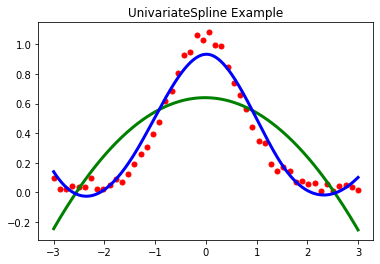

In [219]:
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.random(size=50)
plt.plot(x, y, 'ro', ms=5)

# create the UnivariateSpline object, spl
spl = scipy.interpolate.UnivariateSpline(x, y)

# where to evaluate the spline
xs = np.linspace(-3, 3, 1000)

# why we always tune the smoothing factor
plt.plot(xs, spl(xs), 'g', lw=3)
spl.set_smoothing_factor(0.25)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.title("UnivariateSpline Example")
plt.show()

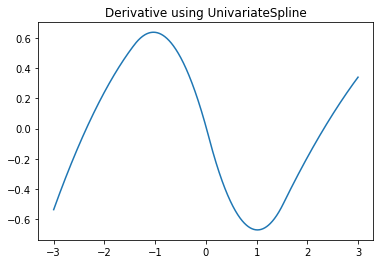

In [220]:
# using the spline to find the derivative
spl_1d = spl.derivative()
plt.plot(xs, spl_1d(xs))
plt.title("Derivative using UnivariateSpline")
plt.show()

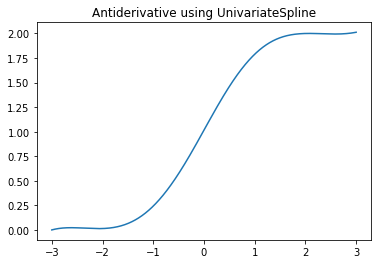

In [221]:
# and to find the integral
spl_1i = spl.antiderivative()
plt.plot(xs, spl_1i(xs))
plt.title("Antiderivative using UnivariateSpline")
plt.show()

many other methods exist for this class, such as finding the value of all derivatives at a single point, calculating a definite integral, finding the zeros of the spline, etc. it is an incredibly useful tool when doing equation modeling during research, and I highly recommend familiarizing yourself with it if you do such work.